# Classification Analysis with Decision Trees

A ***decision tree*** is a supervised machine learning model used to predict a target by learning decision rules from features. As the name suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.

![DT intuiton](https://www.stepupanalytics.com/wp-content/uploads/2017/04/Decision-Tree.png)

From the illustration above we observe that decision trees are attractive models if we care about **interpretability**. Although we will be dealing with Decision Trees and classification, you can also use Decision Trees for regression problems.

## The fundamentals of Decision Trees
A decision tree is constructed by recursive partitioning — starting from the root node (known as the first parent), each node can be split into left and right child nodes. These nodes can then be further split and they themselves become parent nodes of their resulting children nodes.

![DT Split](https://www.altexsoft.com/media/2019/03/https-lh5-googleusercontent-com-kuht_tbdaj_byhll.png)

Now that we understand the concept of leaf nodes (root, parent, and child nodes). We proceed on determining what the *optimal splitting point* is at each node...

Starting from the root, the data is split on the feature that results in the largest **Information Gain (IG)**. In an iterative process, we then repeat this splitting procedure at each child node until the leaves are pure — i.e. samples at each node all belong to the same class.

## Maximizing Information Gain (IG)
In order to split the nodes at the most informative features, we need to define an objective function that we want to optimize via the tree learning algorithm. With regards to IG the objective function is defined as follows:

![Information Gain](https://qph.fs.quoracdn.net/main-qimg-dfad11c548327127fadd25ff992ace92)

Here, *f* is the feature to perform the split, *Dp, Dleft, and Dright* are the datasets of the parent and child nodes, *I* is the impurity measure, *Np* is the total number of samples at the parent node, and *Nleft* and *Nright* are the number of samples in the child nodes.

Note that the above equation is for binary decision trees — each parent node is split into two child nodes only. If you have a decision tree with multiple nodes, you would simply sum the impurity of all nodes.

## Entropy 
You might wonder what is meant with *impurity*, how do you measure this phenomenon? 

According to [Wikipedia](https://en.wikipedia.org/wiki/Entropy_(information_theory)) the definition of Entropy is as follows:

"**Entropy** is the measures of impurity, disorder or uncertainty in a bunch of examples."

Basically, Entropy controls how a Decision Tree decides to split the data. It actually effects how a Decision Tree draws its boundaries. Entropy is mathematically defined as follows:

![Entropy](https://miro.medium.com/max/1275/1*S6zcbdAzUvIOKBaWBKp9MA.png)

Here, *p(x)* is the proportion of the samples that belong to a given class. The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution.

Need more instructions on Decision Trees? We recommend you watch some videos on YouTube. Here's an intuitive video to start of with [Decion Tree by Augmented Startups](https://www.youtube.com/watch?v=DCZ3tsQIoGU).

In [1]:
### Question 1: Why does pruning avoid tree-based models to overfit?
ans_1 = ''
print(ans_1)

In [2]:
### Question 2: What strategies can we use to implement to avoid overfitting specific to tree-based models?
ans_2 = ''
print(ans_2)

## Let's code a Decision Tree

In [3]:
from sklearn.datasets import load_iris
# Load iris dataset into dictionary variable -> data
data = load_iris()
# Return a description of the popular Iris dataset
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Return the independent variables, or X labels
print('X Labels:',data.feature_names)
# Return the dependent variables, or y labels
print('y labels', data.target_names)

X Labels: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y labels ['setosa' 'versicolor' 'virginica']


In [5]:
# We use 80-20 split. Considering that the X and y features are in separate areas of the dictionary we extract them as follows..
train_index = int(len(data['data']) * 0.8)
test_index = int(len(data['data']) * 0.2)

X_train = data['data'][:train_index]
X_test = data['data'][-test_index:]
y_train = data['target'][:train_index]
y_test = data['target'][-test_index:]

# It is always a good practice to check if everything works :D
if len(data['data']) == len(X_train) + len(X_test):
    print('We have separated the data correctly')
else: 
    print('Revise data split')

We have separated the data correctly


In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [7]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [8]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=data.feature_names,filled=True,rounded=True, class_names=data.target_names)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

/Users/davidfortini/miniconda3/envs/weer_invloed/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


FileNotFoundError: [Errno 2] "dot" not found in path.

## What other tree-based models exist?
Decision Trees formed the basis for more complex models. With more complex models we are able to fit an algorithm more naturally to the data, thus achieving (in general) better results! 

Now that you understand Decision Trees, take a look into the following models:
* [Random Forest](https://medium.com/@harshdeepsingh_35448/understanding-random-forests-aa0ccecdbbbb)
* [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* [Gradient Boosted Trees](https://arxiv.org/abs/1603.02754)
* [Adaptive Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

#### Sources
* [Classification and Regression Analysis with Decision Trees by Lorraine Li](https://towardsdatascience.com/https-medium-com-lorrli-classification-and-regression-analysis-with-decision-trees-c43cdbc58054)
* [What is Entropy and why Information gain matter in Decision Trees? by Nasir Islam Sujan](https://medium.com/coinmonks/what-is-entropy-and-why-information-gain-is-matter-4e85d46d2f01)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import cross_val_score
from conf import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.patches as mpatches

df = pd.read_pickle('./creditcard.pkl')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



# 1) What is the class distribution ? What does this mean for our problem?


In [11]:
p_fraud = (df["Class"].value_counts()[1]/df["Class"].value_counts()[0] )* 100
p_fraud = round(p_fraud, 4)
print ( p_fraud, "% of true fraud detected")

0.173 % of true fraud detected


# 2) create test data 
1. Create test data with `train_test_split`  from `scikit-learn`
2. Is the class distribution the same between train and test? 
3. Use `train_test_split` and keep the same distribution
4. Put your training data back together in a dataframe with
` pd.concat([X_train,y_train],axis = 1)`. This dataset will be used later (at part 6).

In [12]:
## answer here
y = df.Class
X = df.drop('Class', axis=1)
original_df = df
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3453,
                                                    random_state=23,
                                                   stratify = y)

(y_train.value_counts()[1]/y_train.value_counts()[0] )* 100
(y_test.value_counts()[1]/y_test.value_counts()[0] )* 100


0.17316193696905494

In [13]:
my_newdf = pd.concat([X_train,y_train],axis = 1)

# 3) Make a scatter plot
1. Select 2 random variables, plot them against each other
2. Add a color for each point corresponding to the `Class` variable
3. What do you observe?


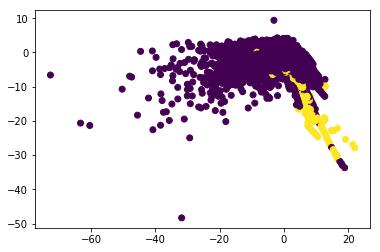

In [14]:
## answer here
plt.scatter(original_df.V2, original_df.V3,c = original_df.Class)


# 4) Think about metrics

1. what is a reasonable metric?
2. what is a possible baseline (model to beat)?
3. What is the score of the baseline?
Tip: You can plot a confusion matrix with
    `plot_confusion_matrix(y_test, MYPRED,np.array(['neg','pos']))`

Unique predicted labels:  [0]
Test score:  0.998271373952656
Confusion matrix, without normalization
[[98174     0]
 [  170     0]]


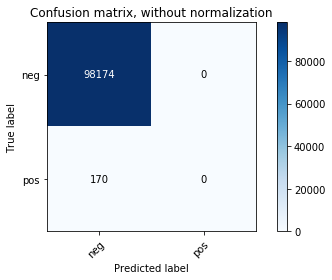

In [15]:
## answer here

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

# confusion matrix
plot_confusion_matrix(y_test, dummy_pred,np.array(['neg','pos']))


# 5) Fit a decision tree and see how it performs
1. What do you see? 
2. How can you improve the result?
Tip: You can plot a confusion matrix with
    `plot_confusion_matrix(y_test, MYPRED,np.array(['neg','pos']))`

Confusion matrix, without normalization
[[98134    40]
 [   46   124]]


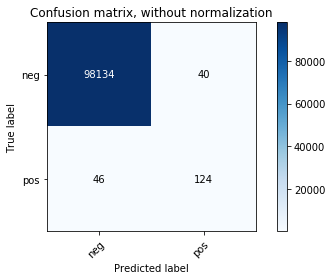

In [16]:
## answer here
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
#cross_val_score(clf, X_train, y_train, cv=10)


# predict on test set
clf_pred = clf.predict(X_test)
recall_score(y_test, clf_pred)
plot_confusion_matrix(y_test, clf_pred,np.array(['neg','pos']))


Normalized confusion matrix
[[9.99592560e-01 4.07439852e-04]
 [2.70588235e-01 7.29411765e-01]]


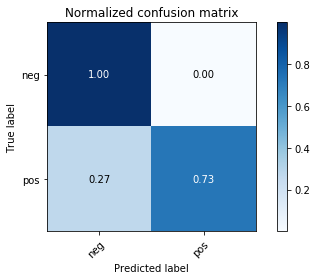

In [17]:
plot_confusion_matrix(y_test, clf_pred,np.array(['neg','pos']),normalize = True)


# 6) Think of how to improve the model and the data 
1. Downsampling could be useful!

Confusion matrix, without normalization
[[87909 10265]
 [   21   149]]
Normalized confusion matrix
[[0.89544075 0.10455925]
 [0.12352941 0.87647059]]


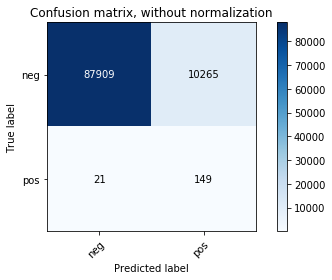

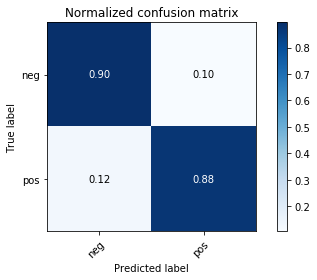

In [18]:
## answer here
# avoid using again test data,

no_frauds = len(my_newdf[my_newdf['Class'] == 1])
non_fraud_indices = my_newdf[my_newdf.Class == 0].index
random_non_fraud_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = my_newdf[my_newdf.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_non_fraud_indices])
under_sample = my_newdf.loc[under_sample_indices,:]

clf = DecisionTreeClassifier(random_state=0)

y = under_sample.Class
X = under_sample.drop('Class', axis=1)


clf.fit(X, y)

# predict on test set
clf_pred = clf.predict(X_test)

recall_score(y_test, clf_pred)

plot_confusion_matrix(y_test, clf_pred,np.array(['neg','pos']));
plot_confusion_matrix(y_test, clf_pred,np.array(['neg','pos']),normalize = True);


7) Try any model and see how to get best performance

In [19]:
## feel free to try anything here!